# Salary Project

In [1]:
#Import the Required Libraries
import pandas as pd
import numpy as np
import scipy
import sklearn
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a dataframe using the given csv file
df=pd.read_csv('salary.csv')

In [3]:
# lets check the first five rows of data
df.head()

,Yearsof Exp,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
# Lets check the shape
df.shape

(30, 2)

In [5]:
# Lets check the type of features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Yearsof Exp    30 non-null float64
Salary         30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


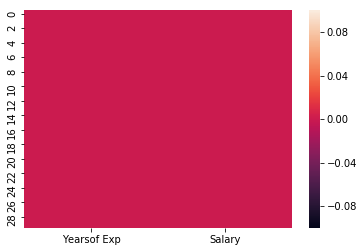

In [6]:
#Lets check the missing values
import seaborn as sns
sns.heatmap(df.isnull())

In [7]:
# Lets confirm the missing values
df.isnull().sum()

Yearsof Exp    0
Salary         0
dtype: int64

In [8]:
# Lets remove the outliers if any
from scipy.stats import zscore
z_score = abs(zscore(df))
dfn = df.loc[(z_score<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(30, 2)
(30, 2)


In [9]:
#Lets check the skewness
dfn .skew()

Yearsof Exp    0.37956
Salary         0.35412
dtype: float64

In [10]:
# Lets check the descriptive statistics
df.describe()

,Yearsof Exp,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
#Lets check the correlation
df.corr()

,Yearsof Exp,Salary
Yearsof Exp,1.000000,0.978242
Salary,0.978242,1.000000


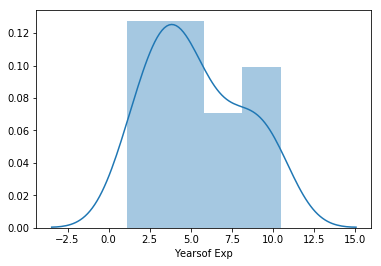

In [12]:
# Lets see the distrubution of 'year of exp'
sns.distplot(df['Yearsof Exp'])

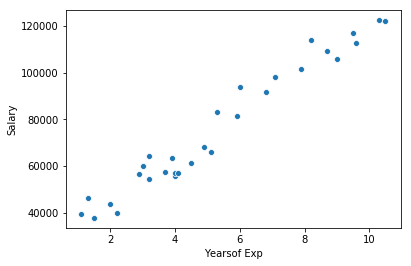

In [13]:
#Lets visulaize the variation in target with feature
sns.scatterplot(df['Yearsof Exp'],df['Salary'])

In [14]:
#Lets seperate feature and Target
x1=df[['Yearsof Exp']]
y=df[['Salary']]

In [15]:
#Lets check the first five rows of feature
x1.head()

,Yearsof Exp
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [16]:
#Lets check the first five rows of target
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


In [17]:
# Lets import the models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [18]:
# Lets scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)

In [19]:
from sklearn.model_selection import train_test_split
from  sklearn. metrics import mean_absolute_error, mean_squared_error,r2_score
# it seems there is linear relation so we can try linear regression
LR=linear_model.LinearRegression()

In [20]:
#lETS FIND THE BEST RANDOM STATE
maxscore =0
for i in range(1,100):
    r_s=i
    X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = r_s)
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    
    print('At random state' ,r_s, 'the r2score is',r2_scr)
    if r2_scr>maxscore:
        maxscore=r2_scr
        finalstate=i
print()
print()
print('max r2 score is', maxscore,'at random state' , finalstate)

At random state 1 the r2score is 0.7616681465472094
At random state 2 the r2score is 0.8886956733784563
At random state 3 the r2score is 0.9695039421049823
At random state 4 the r2score is 0.9504404484884268
At random state 5 the r2score is 0.9439628569611375
At random state 6 the r2score is 0.9368146227107088
At random state 7 the r2score is 0.8143022783109005
At random state 8 the r2score is 0.9631182154839475
At random state 9 the r2score is 0.9388416537799071
At random state 10 the r2score is 0.9816423482070253
At random state 11 the r2score is 0.940882728477622
At random state 12 the r2score is 0.9429269163491423
At random state 13 the r2score is 0.9394460269118792
At random state 14 the r2score is 0.9606215790278544
At random state 15 the r2score is 0.8697012433817216
At random state 16 the r2score is 0.7949890249259298
At random state 17 the r2score is 0.9384744808306156
At random state 18 the r2score is 0.886433064584189
At random state 19 the r2score is 0.9415531751862449
At r

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()  # data is not sufficient

-0.0533642768450965

In [22]:
#lETS SPLIT THE TRAIN AND TEST DATA
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 30)

In [23]:
#Lets create a list of models to be evaluated
models=[]
models.append(('LR',LinearRegression()))
models.append(('LS',Lasso()))
models.append(('RD',Ridge()))
models.append(('EN',ElasticNet()))
models.append(('KN',KNeighborsRegressor()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('SV',SVR()))

In [24]:
#lETS COMPARE THE PERFORMANCE OF MODELS
results = []
names = []
for name, model in models:
        name = model
        name.fit(X_train,y_train)
        y_pred = name.predict(X_test)
        r2_scr = r2_score(y_test,y_pred)
        results.append(r2_scr)
        names.append(name)
        msg = "%s: %f" % (name, r2_scr)
        print(msg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): 0.994409
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False): 0.994410
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001): 0.992804
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False): 0.837622
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'): 0.958022
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_spl

In [25]:
data = {'model':names,'r2score':results}
dfn = pd.DataFrame(data)
dfn.sort_values(by='r2score', ascending =False)

,model,r2score
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.994410
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.994409
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.992804
5,"DecisionTreeRegressor(criterion='mse', max_dep...",0.977546
4,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.958022
3,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",0.837622
6,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.578651


In [26]:
# AS BEST PERFORMANACE ARE GIVEN BY LINEAR REGRESSION AND LASSO AND VERY CLOSE TO EACH OTHER , WE ARE CHOOSING LINEAR REG
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 30)
LRF=linear_model.LinearRegression()
LRF.fit(X_train, y_train)
y_pred = LRF.predict(X_test)
r2_scr = r2_score(y_test,y_pred)
r2_scr

0.9944092048209745

In [27]:
print("r2 score is: ",r2_score(y_test,y_pred))
print("MSE is : ", mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9944092048209745
MSE is :  5453562.219148253
RMSE is :  2335.286324875015


In [28]:
#Lets dump our created model into pkl file
from sklearn.externals import joblib
joblib.dump(LRF,'LR_SALARY.pkl')

['LR_SALARY.pkl']